# Regression and Prediction
This notebook builds linear models and makes sales predictions using Tide data. The goal is to understand how trend and fixed effects affect predictions.

## Data Exploration

In [2]:
df <- read.csv("detergent_data.csv")
head(df)

store,week,sales,price,promoflag
2,1,34,8.701765,1
2,2,46,8.670435,0
2,3,43,8.720233,0
2,4,165,8.738484,0
2,5,77,6.990000,1
2,6,45,8.656667,1


In [8]:
library('psych')
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
store,1,14744,80.9831118,35.804415,86.000000,83.3762292,40.0302000,2.000000,139.00000,137.000000,-0.45964172,-0.6972961,0.294868863
week,2,14744,99.1184889,53.944234,101.000000,99.7483893,66.7170000,1.000000,300.00000,299.000000,-0.02324415,-0.9114066,0.444260157
sales,3,14744,81.2169696,134.143399,48.000000,55.6717531,31.1346000,1.000000,2224.00000,2223.000000,7.42809699,77.5587804,1.104743986
price,4,14744,8.3631988,0.760071,8.476207,8.3955345,0.6681834,4.878372,10.50556,5.627188,-0.46594365,0.1753569,0.006259599
promoflag,5,14744,0.8185024,0.385443,1.000000,0.8981011,0.0000000,0.000000,1.00000,1.000000,-1.65254462,0.7309533,0.003174333


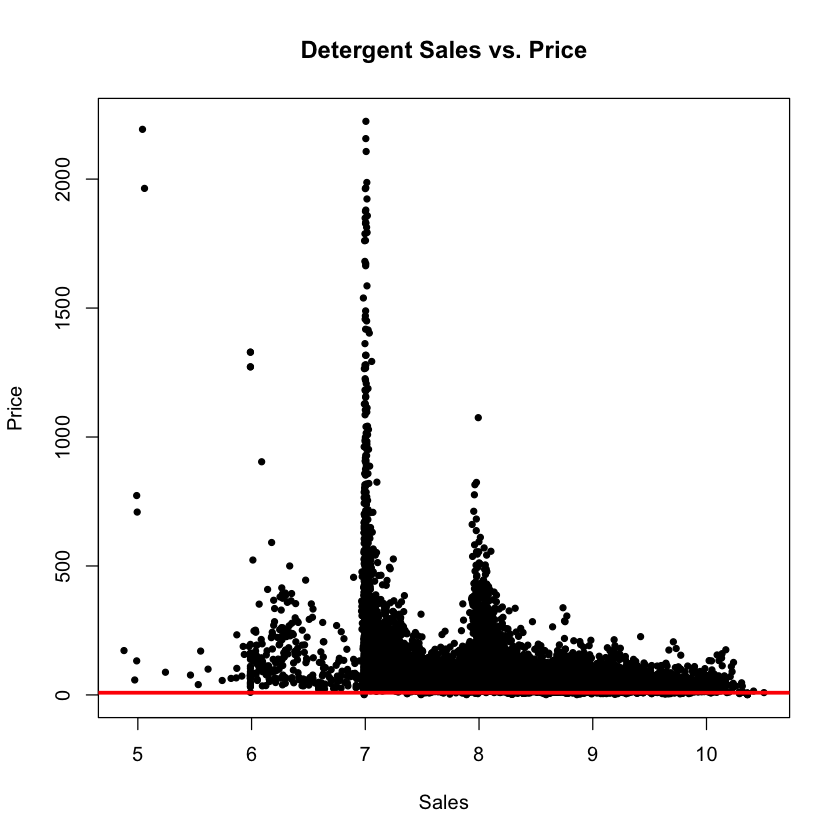

In [7]:
lm1 <- lm( price ~ sales, data = df )

plot( df$price, df$sales, main = "Detergent Sales vs. Price",
      xlab = "Sales", ylab = "Price", pch = 20 )
abline( lm1, col = "red", lwd = 3 )

## Regression Models
Since price does not explain sales, test different variables in the linear model.

In [10]:
# regression with price and promoflag
model1L <- lm( sales~price + promoflag, data = df )
summary( model1L )


Call:
lm(formula = sales ~ price + promoflag, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-259.94  -47.25  -15.51   19.36 2045.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  636.795     11.573  55.024   <2e-16 ***
price        -68.622      1.336 -51.347   <2e-16 ***
promoflag     22.379      2.635   8.492   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123 on 14741 degrees of freedom
Multiple R-squared:  0.1588,	Adjusted R-squared:  0.1587 
F-statistic:  1391 on 2 and 14741 DF,  p-value: < 2.2e-16


In [11]:
# regression with price, promoflag, and linear time trend
model2L <- lm( sales~price + promoflag + week, data = df )
summary( model2L )


Call:
lm(formula = sales ~ price + promoflag + week, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-262.39  -47.39  -15.66   19.46 2044.02 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 633.94646   11.73102  54.040  < 2e-16 ***
price       -68.54153    1.33747 -51.247  < 2e-16 ***
promoflag    21.59894    2.68730   8.037 9.87e-16 ***
week          0.02843    0.01918   1.482    0.138    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123 on 14740 degrees of freedom
Multiple R-squared:  0.1589,	Adjusted R-squared:  0.1587 
F-statistic: 928.2 on 3 and 14740 DF,  p-value: < 2.2e-16


In [12]:
# regression with price, promoflag, and time fixed effect
model3L <- lm( sales~price + promoflag + factor(week), data = df )
summary( model3L )


Call:
lm(formula = sales ~ price + promoflag + factor(week), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1191.94   -18.41    -3.96    12.65  1878.07 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      179.2997    12.7714  14.039  < 2e-16 ***
price            -17.3808     1.2545 -13.854  < 2e-16 ***
promoflag         -7.2057     3.0677  -2.349 0.018845 *  
factor(week)2     -4.2591    10.8031  -0.394 0.693406    
factor(week)3      7.1346    10.7676   0.663 0.507599    
factor(week)4    105.6222    10.6652   9.903  < 2e-16 ***
factor(week)5     67.2293    10.2984   6.528 6.88e-11 ***
factor(week)6     21.1420    10.3973   2.033 0.042030 *  
factor(week)7     30.3143    10.4385   2.904 0.003689 ** 
factor(week)8     31.5211    10.2880   3.064 0.002189 ** 
factor(week)9     22.2312    10.1885   2.182 0.029127 *  
factor(week)10    24.1935    10.7717   2.246 0.024718 *  
factor(week)11     5.3013    10.9161   0.486 0.627227 

The time fixed effect returns the strongest model. Now to test store fixed effects.

In [15]:
# regression with price, promoflag, and store fixed effect
library("plm")
model1P <- plm( sales~price + promoflag + factor(store), data = df )
summary( model1P )

Oneway (individual) effect Within Model

Call:
plm(formula = sales ~ price + promoflag + factor(store), data = df)

Unbalanced Panel: n = 86, T = 32-193, N = 14744

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-237.9065  -43.8488   -9.6513   19.8351 2011.5750 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
price     -76.4248     1.3877 -55.072 < 2.2e-16 ***
promoflag  21.8063     2.5694   8.487 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    253460000
Residual Sum of Squares: 207950000
R-Squared:      0.17956
Adj. R-Squared: 0.17469
F-statistic: 1603.84 on 2 and 14656 DF, p-value: < 2.22e-16

In [17]:
# regression with price, promoflag, linear time trend, and store fixed effect
model2P <- plm( sales~price + promoflag + as.numeric(week) + factor(store), data = df )
summary( model2P )

Oneway (individual) effect Within Model

Call:
plm(formula = sales ~ price + promoflag + as.numeric(week) + 
    factor(store), data = df)

Unbalanced Panel: n = 86, T = 32-193, N = 14744

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-239.3171  -43.7496   -9.7696   20.0042 2010.5522 

Coefficients:
                   Estimate Std. Error  t-value  Pr(>|t|)    
price            -76.393044   1.388175 -55.0313 < 2.2e-16 ***
promoflag         21.339086   2.621159   8.1411 4.231e-16 ***
as.numeric(week)   0.017080   0.018947   0.9015    0.3674    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    253460000
Residual Sum of Squares: 207930000
R-Squared:      0.17961
Adj. R-Squared: 0.17468
F-statistic: 1069.49 on 3 and 14655 DF, p-value: < 2.22e-16

In [18]:
# regression with price, promoflag, time fixed effect, and store fixed effect
model3P <- plm( sales~price + promoflag + factor(week) + factor(store), data = df )
summary( model3P )

Oneway (individual) effect Within Model

Call:
plm(formula = sales ~ price + promoflag + factor(week) + factor(store), 
    data = df)

Unbalanced Panel: n = 86, T = 32-193, N = 14744

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-1.1609e+03 -1.4138e+01  3.2946e-02  1.2812e+01  1.7795e+03 

Coefficients:
                  Estimate Std. Error  t-value  Pr(>|t|)    
price            -22.49912    1.49199 -15.0799 < 2.2e-16 ***
promoflag          0.21908    2.81087   0.0779 0.9378763    
factor(week)2      4.20899    9.67362   0.4351 0.6634964    
factor(week)3     16.47626    9.64064   1.7090 0.0874647 .  
factor(week)4    114.76769    9.54864  12.0193 < 2.2e-16 ***
factor(week)5     64.72069    9.25411   6.9937 2.794e-12 ***
factor(week)6     26.04145    9.29189   2.8026 0.0050760 ** 
factor(week)7     31.67467    9.32950   3.3951 0.0006879 ***
factor(week)8     33.75462    9.19479   3.6711 0.0002424 ***
factor(week)9     25.55041    9.10635   2.8058 0.0050262 

Summarize the model estimates for price and promoflag in a table.

In [19]:
results_table1 = function(model_list, vars) {
  # build leftmost column of results table  
  outrec = c()
  for (j in 1:length(vars)) {
    outrec = c(outrec,sprintf("%s",vars[j]))
    outrec = c(outrec,"")
  }
  outrec = c(outrec,"R^2")
  outrec = c(outrec,"Observations")
  outdf = as.data.frame(outrec) 
  # process each model
  for (i in 1:length(model_list)) {
    # extract estimates for this model
    mod = eval(parse(text=model_list[i]))
    estimates = summary(mod)$coefficients[vars,"Estimate"]
    ses = summary(mod)$coefficients[vars,"Std. Error"]
    pvals = summary(mod)$coefficients[vars,"Pr(>|t|)"]
    # process each parameter of interest
    outrec = c()
    for (j in 1:length(vars)) {
      # set significance stars
      star = ""
      if (pvals[j] <= .05) {star = "*"}
      if (pvals[j] <= .01) {star = "**"}
      if (pvals[j] <= .001) {star = "***"}
      # output estimate and std err
      outrec = c(outrec,sprintf("%.4f%s",estimates[j],star))
      outrec = c(outrec,sprintf("(%.4f)",ses[j]))
    }
    # add R^2, # of observations to output
    outrec = c(outrec,sprintf("%.4f",summary(mod)$r.squared[1]))
    outrec = c(outrec,sprintf("%d",nobs(mod)))
    outdf = cbind(outdf,outrec)
  }
  # set column names to model names
  names(outdf) = c("",model_list)
  outdf
}

In [21]:
library(knitr)

full_model_list = c("model1L", "model2L", "model3L", "model1P", "model2P", "model3P")
full_vars = c("price", "promoflag")
full_outdf = results_table1(full_model_list, full_vars)
kable(full_outdf,align='c')



|              |   model1L   |   model2L   |   model3L   |   model1P   |   model2P   |   model3P   |
|:------------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|    price     | -68.6215*** | -68.5415*** | -17.3808*** | -76.4248*** | -76.3930*** | -22.4991*** |
|              |  (1.3364)   |  (1.3375)   |  (1.2545)   |  (1.3877)   |  (1.3882)   |  (1.4920)   |
|  promoflag   | 22.3790***  | 21.5989***  |  -7.2057*   | 21.8063***  | 21.3391***  |   0.2191    |
|              |  (2.6354)   |  (2.6873)   |  (3.0677)   |  (2.5694)   |  (2.6212)   |  (2.8109)   |
|     R^2      |   0.1588    |   0.1589    |   0.7959    |   0.1796    |   0.1796    |   0.8305    |
| Observations |    14744    |    14744    |    14744    |    14744    |    14744    |    14744    |

Adding time fixed effects creates the biggest changes in parameter estimates. This suggests that there is a high omitted variable bias in time effects.

## Predictions

In [22]:
# predict total baseline sales
model3L.yhat1 <- predict( model3L )
sum( model3L.yhat1 )

[1] 1197463

In [23]:
# predict baseline sales with 1% increase in price
df2 <- df
df2$price <- df2$price * 1.01

model3L.yhat2 <- predict( model3L, newdata = df2 )
sum( model3L.yhat2 )

[1] 1176031

In [24]:
# compute change in predicted sales
( sum( model3L.yhat1 ) - sum( model3L.yhat2 ) ) / sum( model3L.yhat1 ) * 100

[1] 1.789764